In [1]:
%%writefile data.csv
x1,x2,x3,y
a,e,h,A
a,e,i,C
a,e,j,B
a,f,h,A
a,f,i,A
a,g,h,A
a,g,h,B
b,e,i,B
b,f,i,B
b,f,j,B
b,g,j,C
c,e,i,C
c,f,j,C
c,g,h,B
c,g,i,B
c,g,j,C
d,f,j,A
d,g,j,A

Writing data.csv


## Definición de probabilidad como frecuencia

**Espacio muestral**: se define como el conjunto de todos los posibles resultados de un experimento.

**Pregunta** En la tirada de dos dados ¿cuál es el espacio muestral?

**Evento:** Es cualquier colección de posibles resultados de un experimento (subconjunto del espacio muestral)

En su forma más simple, el concepto de probabilidad puede interpretarse como la frecuencia con que ocurre un evento. Por ejempo, si en la tirada de dos dados se definen como un evento la cantidad de posibles resultados que dan una suma determinada, entonces:

Pr(𝑋= 2) = 1 / 36   Pr(𝑋= 6) = 5 / 36   Pr(𝑋=10) = 3 / 36
Pr(𝑋= 3) = 2 / 36   Pr(𝑋= 7) = 6 / 36   Pr(𝑋=11) = 2 / 36
Pr(𝑋= 4) = 3 / 36   Pr(𝑋= 8) = 5 / 36   Pr(𝑋=12) = 1 / 36
Pr(𝑋= 5) = 4 / 36   Pr(𝑋= 9) = 4 / 36

El algoritmo funciona de la siguiente forma: se toma el primer atributo x1 y se divide en grupos por cada valor que puede tomar dicho atributo, es decir, por a, b, c, y d; para cada atributo se determina a que clase es más probable que pertenezca los ejemplos y se asigna dicha clase a dicho atributo. Es decir, para cada atributo se cuentan cuántos ejemplos hay de cada categoría y se asigna la clase por mayoría, esto es, si hay cuatro ejemplos para la categoría a de x1 y tres de ellos pertencen a la clase A y el restante a C se dice que if x1 == a: y = A; esto equivale a decir que si x1 == a es más probable que el ejemplo pertenezca a la clase sea A. Así, el clasificador basado en este atributo podría ser escrito como un sistema de reglas:

## Métricas de desempeño de clasificadores

Para evaluar el desempeño en problemas de clasificación dicotómicos (dos clases mutuamente excluyentes) se usa la matriz de confusión:

         | Pronostico
         |  P     N
---------|------------
      P  |  TP    FN
Real     |
      N  |  FP    TN

TP - Verdadero positivo (correcto)
TN - Verdadero negativo (correcto)
FN - Falso negativo (mal clasificado)
FP - Falso positivo (mal clasificado)

Esta tabla permite analizar el comportamiento del modelo.

La medición de la precisión del modelo permite estimar el desempeño del modelo ante nuevos datos.

Tasa de éxito (porcentaje de patrones clasificados correctamente):

success rate=TP+TN/TP+TN+FP+FN

Tasa de error (porcentaje total de patrones clasificados incorrectamente):

error rate=FP+FN/TP+TN+FP+FN=1−accuracy

Precisión o valor predictivo positivo: Proporción de casos positivos que fueron verdaderamente positivos.

precision=TP/TP+FP

Valor predictivo negativo: Proporción de casos negativos que fueron verdaderamente negativos.

negative predictive value=TN/TN+FN

Sensibilidad, tasa verdadera positiva, recall: mide la proporción de ejemplos positivos que fueron correctamente clasificados.

sensitibity=TP/TP+FN

Especifidad o tasa verdadera negativa: mide la proporción de ejemplos negativos correctamente clasificados.

specifity=TN/TN+FP

In [5]:
import pandas as pd
df = pd.read_csv("data.csv")

### Preparación y carga de datos

In [11]:
## Preparación

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline


In [91]:
## Carga de archivo

df = pd.read_csv("data.csv", sep = ",", thousands = None, decimal = ".")
df.head()

,x1,x2,x3,y
0,a,e,h,A
1,a,e,i,C
2,a,e,j,B
3,a,f,h,A
4,a,f,i,A


### Generación de las reglas

In [92]:
def oneR_fit(df, var, target):
    #crear una copia para no modificar el df original
    
    df0 = df.copy()
    
    #Columna para contar la cantidad de ocurrencias del target
    df0["counter"] = 0
    
    #conteo
    df0 = df0.groupby([var, target], as_index = False).count()[[var, target, "counter"]]
    
    ##generar un vector con el máximo conteo por cada valor de var
    df0_max_counter = df0.groupby([var], as_index=False)["counter"].transform(max)
    
    # vector de True/False indicando si la fila contiene el valor máximo del conteo
    df0_idx = df0["counter"] == df0_max_counter["counter"]
    
    # Seleccionar var y target para los maximos
    df0 = df0.loc[df0_idx, [var, target]]
    
    # obtiene solo la primera fila si las varias clases
    # tienen la misma frecuencia máxima
    df0 = df0.groupby(var, as_index=False).first()
    
    #convierte var en el indice de la tabla
    df0 = df0.set_index(var)
    
    return df0

In [93]:
df1 = df.copy()
df1["counter"] = 0
df1 = df1.groupby(["x1", "y"], as_index = False).count()[["x1", "y", "counter"]]
df1_max_values = df1.groupby(["x1"], as_index = False)["counter"].transform(max)
df0_idx = df1["counter"] == df1_max_values["counter"]
df0 = df1.loc[df0_idx, ["x1", "y"]]
df0.set_index("x1")

,y
x1,
a,A
b,B
c,C
d,A


In [94]:
# reglas para x1
rules_x1 = oneR_fit(df, "x1", "y")
rules_x1

,y
x1,
a,A
b,B
c,C
d,A


In [95]:
# reglas para x2
rules_x2 = oneR_fit(df, "x2", "y")
rules_x2

,y
x2,
e,B
f,A
g,B


In [96]:
# reglas para x3
rules_x3 = oneR_fit(df, "x3", "y")
rules_x3

,y
x3,
h,A
i,B
j,C


## Predicción

In [109]:
def oneR_predict(df, rules):
    ## genera una copia del DataFrame
    df0 = df.copy()

    ## convierte la variable usada para construir las reglas
    ## en el indice de las filas del dataframe
    df0 = df0.set_index(rules.index.name, drop=False)

    ## hace un left join con base en los valores de los
    ## indices de las filas del df y rules
    df0 = df0.join(rules, rsuffix='_predicted_' + rules.index.name)
    df0.index = range(len(df0))

    return df0

In [114]:
df1 = df.copy()
# df1 = df1.set_index(rules_x1.index.name, drop=False)
# df1 = df1.join(rules_x1, rsuffix ="_predicted_" + rules_x1.index.name)
# df1.index = range(len(df1))
# df1

In [115]:
df1 = oneR_predict(df1, rules_x1)
df1 = oneR_predict(df1, rules_x2)
df1 = oneR_predict(df1, rules_x3)
df1

,x1,x2,x3,y,y_predicted_x1,y_predicted_x2,y_predicted_x3
0,a,e,h,A,A,B,A
1,a,f,h,A,A,A,A
2,a,g,h,A,A,B,A
3,a,g,h,B,A,B,A
4,c,g,h,B,C,B,A
5,a,e,i,C,A,B,B
6,b,e,i,B,B,B,B
7,c,e,i,C,C,B,B
8,a,f,i,A,A,A,B
9,b,f,i,B,B,A,B


### Precisión

In [116]:
print("x1: ",  (df1.y == df1.y_predicted_x1).sum())
print("x2: ", (df1.y == df1.y_predicted_x2).sum())
print("x3:", (df1.y == df1.y_predicted_x3).sum())

x1:  12
x2:  8
x3: 9


### Matriz de confusión

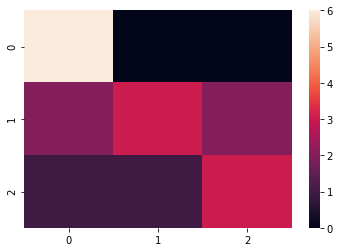

In [118]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(df1.y, df1.y_predicted_x1))

In [119]:
confusion_matrix(df1.y, df1.y_predicted_x2)

array([[3, 3, 0],
       [2, 5, 0],
       [1, 4, 0]], dtype=int64)

In [120]:
confusion_matrix(df1.y, df1.y_predicted_x3)

array([[3, 1, 2],
       [2, 3, 2],
       [0, 2, 3]], dtype=int64)

In [122]:
%%R -i df
##
## Instalación del paquete:
##
##       install.packages("OneR")
##

##
## Carga la librería.
##
library(OneR)

##
## Crea el clasificador. La librería reporta la precisión
## del clasificador si se usa cada uno de los atributos
## (variables x) y el sistema de reglas obtenido.
## La notación y ~ . indica que la variable y del dataframe es función de las restantes
##
clf <- OneR(y ~ ., data = df, verbose = TRUE)

##
## la salida del modelo indica la tasa de éxito para los clasificadores de todas las clases
## Igualmente se imprimen las reglas de decisión para el mejor clasificador
##
clf

SyntaxError: invalid syntax (<ipython-input-122-ac9078c3b320>, line 18)